In [1]:
pip install -q numpy pandas tensorflow  pillow scipy imageio git+https://github.com/tensorflow/docs tensorflow-probability

Note: you may need to restart the kernel to use updated packages.


## Task 1:
### Part 1:CNN

I chose to use the cifar10 dataset for my convolutional neural network.
* dataset link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10
From the source: https://www.cs.toronto.edu/~kriz/cifar.html
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes in the dataset are as follows: airplane automobile bird cat deer dog frog horse ship truck

With the expected accuracy error of 18% for a good implementation (see link above)

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
~Five first examples in the dataset~


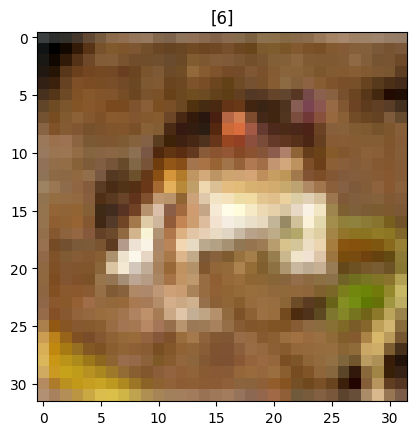

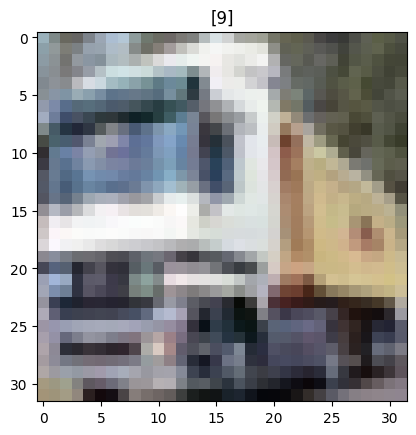

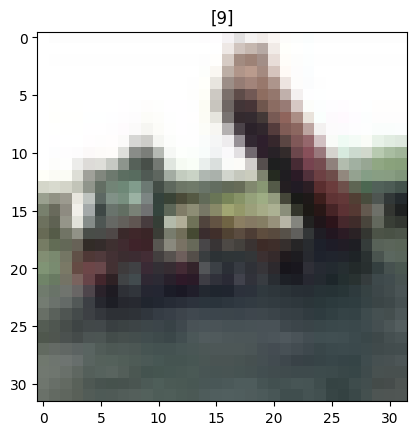

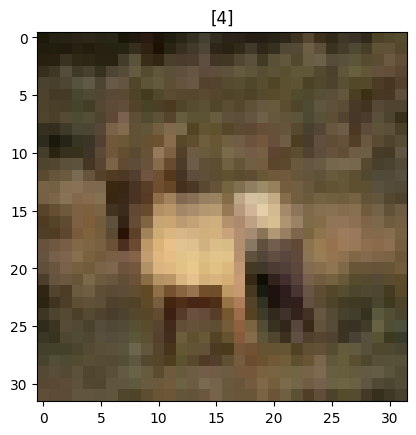

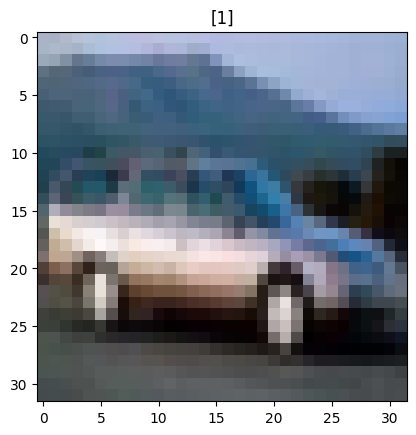

In [25]:
# Data downloading and visualization
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

print("~Five first examples in the dataset~")
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

In [26]:
# Data preprocessing
n_classes = 10

# Normalize between 0-1
x_train = x_train.astype('float32') / x_train.max()
x_test = x_test.astype('float32') / x_test.max()

# One hot encoding
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=n_classes, dtype='float32'
)
y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=n_classes, dtype='float32'
)

input_shape = x_train.shape[1:]

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Flatten, MaxPooling2D, Dropout

model = Sequential()
# Conv block 1
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=input_shape))
model.add(ReLU())
model.add(Conv2D(32, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Conv block 2
model.add(Conv2D(128, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(128, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.2))
# Conv block 3
model.add(Conv2D(256, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(256, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Output block
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(n_classes, activation='softmax'))
         
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 re_lu_18 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_19 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

### Model Architecture
I decided to look at vgg for inspiration on convolutional blocks and decided on three seperate blocks of similar composition. Each block has two convolutional layers, two batchnormalizations, two activations (all relu), followed by dropout to reduce overfitting and maxpooling to reduce dimensionality. With each reduction in dimensionality of the image the number of filters is increased by powers of two in order to avoid a dataflow choke point in the model and allow for uniform parameterization.

Finally for the output block the model is simply flattened with 1 256 neuron FC layer with relu activation before the output layer of 10 neurons one per each output class with softmax activation to keep the magnitude of the output =1.

In [28]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

loss_funct = categorical_crossentropy
opt = Adam(learning_rate=1e-3) 
model.compile(loss=loss_funct, optimizer=opt, metrics=['mae','accuracy'])

In [29]:
batch_size = 256
epochs = 20
print(y_train.shape)
results = model.fit(x_train, y_train,shuffle=True, epochs=epochs, batch_size=batch_size,validation_split=0.2)

(50000, 10)
Epoch 1/20
157/157 [==============================] - 8s 46ms/step - loss: 2.1625 - mae: 0.1602 - accuracy: 0.3013 - val_loss: 4.4013 - val_mae: 0.1799 - val_accuracy: 0.1163
Epoch 2/20
157/157 [==============================] - 7s 45ms/step - loss: 1.3555 - mae: 0.1259 - accuracy: 0.5015 - val_loss: 3.3853 - val_mae: 0.1749 - val_accuracy: 0.1218
Epoch 3/20
157/157 [==============================] - 7s 45ms/step - loss: 1.0637 - mae: 0.1009 - accuracy: 0.6169 - val_loss: 1.8889 - val_mae: 0.1418 - val_accuracy: 0.3751
Epoch 4/20
157/157 [==============================] - 7s 45ms/step - loss: 0.8434 - mae: 0.0809 - accuracy: 0.7016 - val_loss: 0.9987 - val_mae: 0.0899 - val_accuracy: 0.6492
Epoch 5/20
157/157 [==============================] - 7s 45ms/step - loss: 0.7087 - mae: 0.0691 - accuracy: 0.7498 - val_loss: 0.8055 - val_mae: 0.0697 - val_accuracy: 0.7195
Epoch 6/20
157/157 [==============================] - 7s 45ms/step - loss: 0.6138 - mae: 0.0605 - accuracy: 0.786

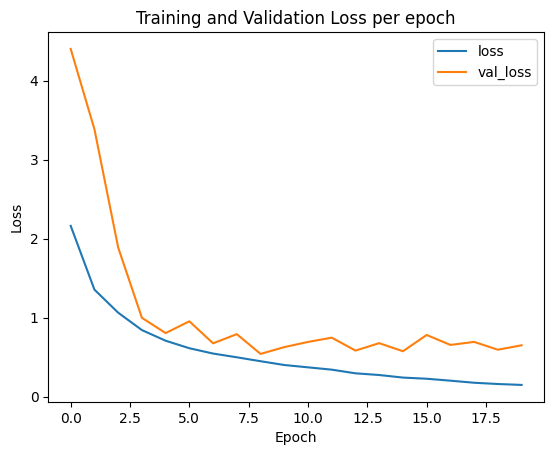

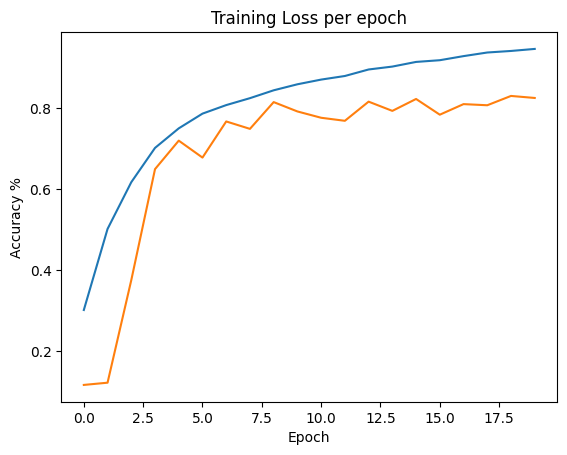

In [30]:
# Training Statistics
plt.title("Training and Validation Loss per epoch")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.title("Training and Validation Accuracy per epoch")
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')
plt.title("Training Loss per epoch")
plt.show()

### Training
The model was trained using the Adam optimizer and cross entropy which is standard for image classification. From these graphs we can see the model's variance on the validation set of 20% is relatively high but generally the accuracy of the validation set and loss seems to trend with the training albeit lagging behind. This could be an indication of some overfitting which CIFAR-10 is known for. The validation split was used to fine tune the hyperparameters however a standard learning rate and optimizer were found to be effective and stable. 

In [39]:
import numpy as np
# Final model performance
stats = model.evaluate(x_test,y_test)

y_pred = model.predict(x_test)
top_k = tf.keras.metrics.top_k_categorical_accuracy(y_test, y_pred, k=3)

print(f"Test set categorical_crossentropy loss: {stats[0]} \t Test set Accuracy: {100*stats[2]:0.2f}%")
print(f"Top 3 categorical accuracy: {100*np.mean(top_k.numpy()):0.4f}%")

313/313 [==============================] - 1s 3ms/step
Test set categorical_crossentropy loss: 0.6716949939727783 	 Test set Accuracy: 82.58%
Top 3 categorical accuracy: 96.2000%


## Analysis
Overall, I am very pleased with the final model outcome after investigating optimal architectures this seems to perform on par with advanced methods easily implemented in keras. The categorical cross entropy loss is relatively low at 0.67 for 10 classes in the test set and is appropriote for classification as it is based on a per category log scale which not only punishes incorrect classifications but confidence in correct classfications as well stronger then something like mean squared error. I also chose traditional accuracy to measure the model performance with reached 82.58% on CIFAR-10 which is respectable considering the CIFAR-10 dataset is notoriously harder then MNIST with a large 20% chunk of the training used for validation in this case. Finally top 3 categorical accuracy was used as sometimes multiclassification models can be close to the correct prediction but below the first pick threshold and for 96% it demonstrates the model has properly learned representations in the dataset that allow it to not only accurate in the cases it is right but close to the correct class when the model is incorrect.

## Part 2: Transfer learning with MobileNet

In [40]:
mobile = tf.keras.applications.MobileNet(input_shape=(32,32,3), weights='imagenet',include_top=False)

mobile_model = Sequential()
mobile_model.add(mobile)
#mobile_model.add(MaxPooling2D(pool_size=(2, 2)))
mobile_model.add(Flatten())
mobile_model.add(Dense(1024, activation="relu"))
mobile_model.add(Dropout(0.2))
mobile_model.add(Dense(1024, activation="relu"))
mobile_model.add(Dense(10, activation="softmax"))

mobile_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                      

In [41]:
mobile_model.compile(loss='categorical_crossentropy', optimizer= 'Adam',metrics=['mae','accuracy'])

In [42]:
batch_size = 256
epochs = 20
results = mobile_model.fit(x_train, y_train,shuffle=True, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 14s 77ms/step - loss: 1.1417 - mae: 0.0965 - accuracy: 0.6231 - val_loss: 1.7082 - val_mae: 0.1174 - val_accuracy: 0.4898
Epoch 2/20
157/157 [==============================] - 12s 74ms/step - loss: 0.6436 - mae: 0.0597 - accuracy: 0.7832 - val_loss: 0.7467 - val_mae: 0.0741 - val_accuracy: 0.7417
Epoch 3/20
157/157 [==============================] - 12s 74ms/step - loss: 0.4998 - mae: 0.0470 - accuracy: 0.8317 - val_loss: 0.9487 - val_mae: 0.0704 - val_accuracy: 0.7197
Epoch 4/20
157/157 [==============================] - 11s 73ms/step - loss: 0.3985 - mae: 0.0383 - accuracy: 0.8655 - val_loss: 0.7795 - val_mae: 0.0580 - val_accuracy: 0.7615
Epoch 5/20
157/157 [==============================] - 11s 72ms/step - loss: 0.3305 - mae: 0.0317 - accuracy: 0.8876 - val_loss: 0.7589 - val_mae: 0.0521 - val_accuracy: 0.7760
Epoch 6/20
157/157 [==============================] - 12s 73ms/step - loss: 0.2818 - mae: 0.0273 - accuracy: 0.9064 - va

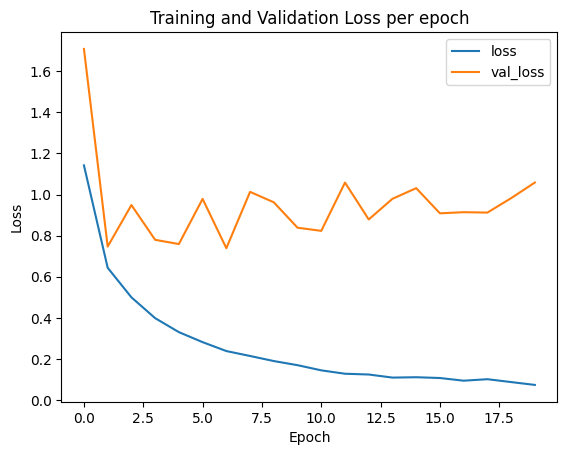

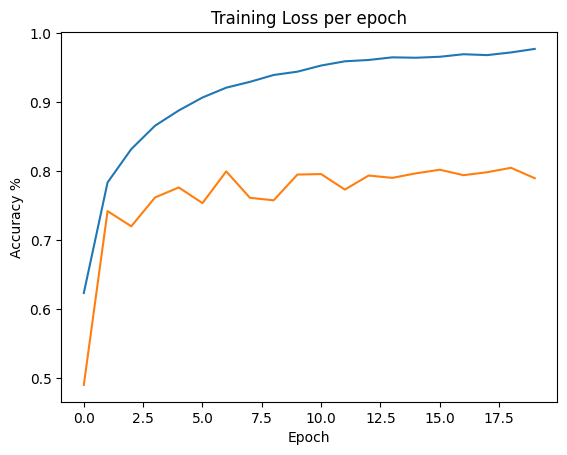

In [43]:
# Training Statistics
plt.title("Training and Validation Loss per epoch")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.title("Training and Validation Accuracy per epoch")
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')
plt.title("Training Loss per epoch")
plt.show()

## Transfer learning training
Unsurprisingly this model was more prone to overfitting due to it's overparamaterization on this dataset this results in the curves above where the validation set lags begind the training set significantly. Overall though the accuracy and loss are still improving up to the 18th epoch so the model still seems to be learning generalization ableit slowly likely due to the pretrained model weights being frozen in the interest of speed. Without updating the pretrained model weights (which would introduce a huge training burden) the internal representation of the majority of the model is unable to change so the last few layers must interpret whatever has already been learned on previous sometimes unrelated datasets

In [44]:
# Final model performance
stats = mobile_model.evaluate(x_test,y_test)
y_pred = mobile_model.predict(x_test)
top_k = tf.keras.metrics.top_k_categorical_accuracy(y_test, y_pred, k=3)

print(f"Test set categorical_crossentropy loss: {stats[0]} \t Test set Accruacy: {100*stats[2]:0.2f}%")
print(f"Top 3 categorical accuracy: {100*np.mean(top_k.numpy()):0.4f}%")

313/313 [==============================] - 1s 3ms/step
Test set categorical_crossentropy loss: 1.1380877494812012 	 Test set Accruacy: 78.24%
Top 3 categorical accuracy: 93.9400%


## Analysis
For the transfer learning segment I chose mobilenet as it's slim architecture would be ideal for processing smaller datasets like CIFAR-10 on something like mobile phones or edge devices allowing for faster inference and fewer model parameters. Overall keras made this implemenation surprisingly easy to transfer learn. For performance, I spent a lot of time and research optimizing the architecture in one for this problem so it is not surprising that the transfer learned model performed worse at 78% accuracy with worse training curves and cross entropy loss of 1.1.  Surprisingly the top 3 categorical loss is still high at ~94% indicating this model did generalize in it's predictions as it was able to nearly guess the correct class often and 78% for CIFAR-10 is still a reasonable accuracy.

I beleive that this model performed worse due to the training weights of the pretrained model being frozen to save on training time. Not only is this model larger and slower due to Mobile net then my first version but it is also unable to train on a majority of these weights. Perhaps unlocking these weights and waiting the longer training time is needed on this dataset with this model. On the other hand, creating this model was vastly faster then the fine tuning in Part1 so tranfer learning offers an easy alternative to ML architecture search.

## Part 3: Data Augmentation

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

xgen = ImageDataGenerator(horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    zoom_range=0.1,
    validation_split=0.2
    )
xgen.fit(x_train)

loss_funct = categorical_crossentropy
opt = Adam(learning_rate=1e-3) 

aug_model= tf.keras.models.clone_model(model)
aug_model.compile(loss=loss_funct, optimizer=opt, metrics=['mae','accuracy'])


Tensorflow makes data augmentation for images easy with datagenerators and parameters were chosen by looking at the origional images displayed above and considering reasonable deformations such that a human could still correctly classify that sample.

In [61]:
aepoch = 30
results = aug_model.fit(xgen.flow(x_train, y_train, batch_size=128, subset='training'),
                        validation_data=xgen.flow(x_train, y_train, batch_size=128, subset='validation'),
                        steps_per_epoch = int(0.8*len(x_train)) // 128, 
                        validation_steps = int(0.2*len(x_train)) // 128,
                        epochs = aepoch)

Epoch 1/30
312/312 [==============================] - 19s 59ms/step - loss: 1.8370 - mae: 0.1488 - accuracy: 0.3665 - val_loss: 3.2379 - val_mae: 0.1733 - val_accuracy: 0.1467
Epoch 2/30
312/312 [==============================] - 18s 58ms/step - loss: 1.2810 - mae: 0.1173 - accuracy: 0.5373 - val_loss: 1.2810 - val_mae: 0.1136 - val_accuracy: 0.5382
Epoch 3/30
312/312 [==============================] - 18s 58ms/step - loss: 1.0670 - mae: 0.0995 - accuracy: 0.6217 - val_loss: 1.2590 - val_mae: 0.1088 - val_accuracy: 0.5543
Epoch 4/30
312/312 [==============================] - 19s 60ms/step - loss: 0.9383 - mae: 0.0884 - accuracy: 0.6696 - val_loss: 1.0440 - val_mae: 0.0925 - val_accuracy: 0.6299
Epoch 5/30
312/312 [==============================] - 18s 58ms/step - loss: 0.8441 - mae: 0.0804 - accuracy: 0.7015 - val_loss: 1.0987 - val_mae: 0.0885 - val_accuracy: 0.6314
Epoch 6/30
312/312 [==============================] - 18s 58ms/step - loss: 0.7898 - mae: 0.0754 - accuracy: 0.7227 - va

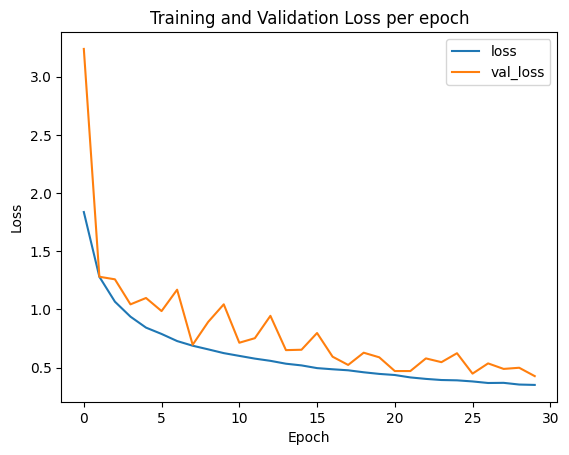

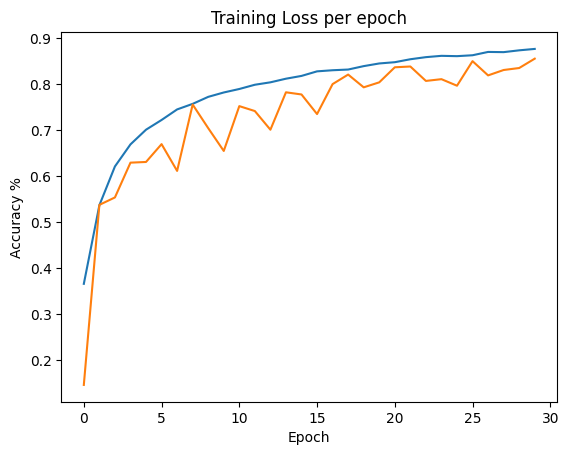

In [62]:
# Training Statistics
plt.title("Training and Validation Loss per epoch")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.title("Training and Validation Accuracy per epoch")
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')
plt.title("Training Loss per epoch")
plt.show()

These training curves look the best of all three examples as the validation loss and accuracy trends closely with the training data indicating low overfitting which makes sense considering it is harder to memorize data that is constantly being augemented.

In [63]:
# Final model performance
stats = aug_model.evaluate(x_test,y_test)
y_pred = aug_model.predict(x_test)
top_k = tf.keras.metrics.top_k_categorical_accuracy(y_test, y_pred, k=3)

print(f"Test set categorical_crossentropy loss: {stats[0]} \t Test set Accruacy: {100*stats[2]:0.2f}%")
print(f"Top 3 categorical accuracy: {100*np.mean(top_k.numpy()):0.4f}%")

313/313 [==============================] - 1s 3ms/step
Test set categorical_crossentropy loss: 0.4730681777000427 	 Test set Accruacy: 85.38%
Top 3 categorical accuracy: 96.7000%


## Data Augementation Analysis
This technique proved to be the most effective in increasing overall model performance and with it's ease of implementation I think this method has some obvious advantages to be applied to computer vision.
First as mentioned before the training curves and ability to train for more epochs implies higher training stability and resistence to overfitting since the datagenerator and it's various augmentations to the data prevent the model from relying on highly localized features to memorize the dataset. Along with the more stable training performance the overall model performance is better with 85.38% accuracy on the test set, 0.47 cross entropy loss, and an impressive top 3 categorical accuracy of 96.7%. The model's ability to train longer forced it to generalize to the augemented data and perform better on the overall dataset with the more general features learned. Therefore this model acheives the best classification perfomance on CIFAR-10 indicating the power of data augmentation and it's ability to drastically improve model perfomance alone.

# Task 2:
## Variational Autoencoder (VAE):
following the tutorial on TensorFlow: https://www.tensorflow.org/tutorials/generative/cvae

Using the Fashion MNIST dataset

Dataset link:
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [64]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

train_size = 60000
batch_size = 32
test_size = 10000

def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

Fashion MNISt is the same size as MNIST 28 by 28 and grayscale leaving conversion code largely the same as the tutorial

In [65]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=128, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Here we can see the encoder to decoder model is relatively simple consisting of convolutional layers with some dense layers. Without the presence of dropout or any traditional overfitting mitigation I wonder how this tutorial model generalizes to the dataset.

In [66]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 3
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)


def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

For my implementation of the tutorial I decided to increase the dimensionality of the latenet space as it seemed to provide better performance on the FashionMNIST dataset likely because the dataset is slightly more visually complex and therefore cannot be encoded in the same low dimensional space as MNIST.

In [67]:
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 10, Test set ELBO: -173.11447143554688, time elapse for current epoch: 6.8479697704315186


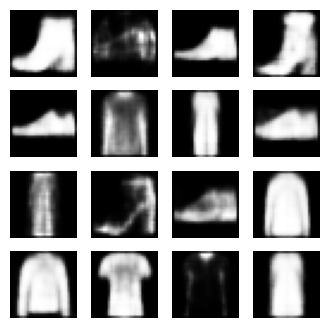

In [68]:
import time
import numpy as np
from IPython import display
import PIL

generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)



### Training Analysis
It was interesting to watch the training of the VAE develop as fairly quickly the model converged and I was able to make out distinct clothing items such as shoes jackets and shirts. After 10 breif epochs the images gained higher frequency details and the generated sample look similar to the original dataset. Unfortunately for VAE it is hard to measure generalizability as overfitting the dataset is extremely common for autoencoders.

(-0.5, 399.5, 399.5, -0.5)

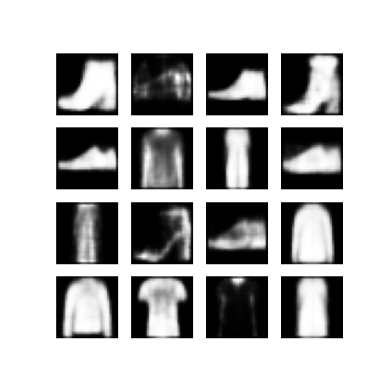

In [69]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

Overall these images look like reasonable generations from the low resolution Fashion MNIST dataset


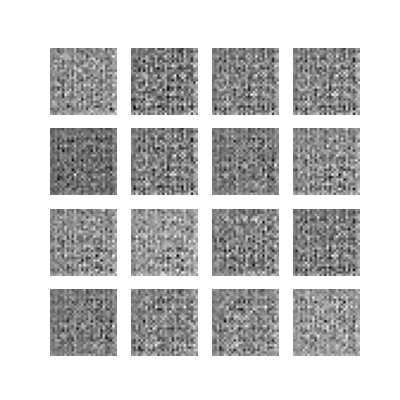

In [73]:
import imageio.v2 as imageio
import glob

anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
    
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

This gif showing the training process demonstates some of the architectural artifacts seen early in the training which are eventually smoothed out to produce reasonable replications of the dataset.

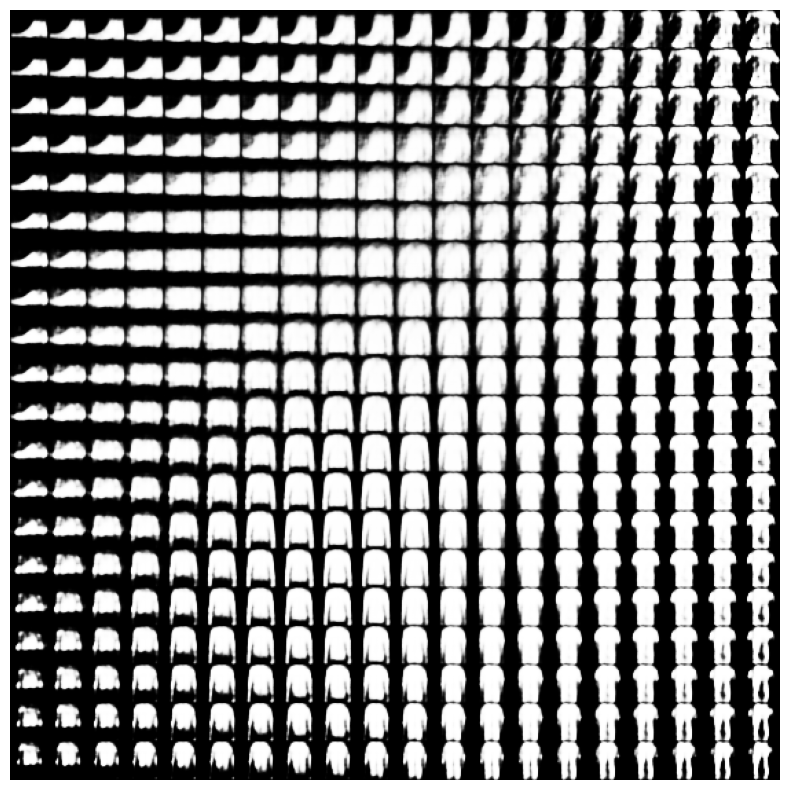

In [71]:
import tensorflow_probability as tfp

def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi,xi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()
plot_latent_images(model, 20)

This 2D manifold shows the traveral of the latent space which connects shoes to shirts to pants visually confirming that semantic information has been encoded in the latentspace

## Analysis
Overall VAE for image generation is an interesting technique due to the semantic representation given to the latent space that allows for more control of generation then a GAN while producing reasonable images for fashion MNIST such that they are all clearly within one of the classes

## Part 2: Generative Adversarial Networks (GANs): 

In [74]:
import glob
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


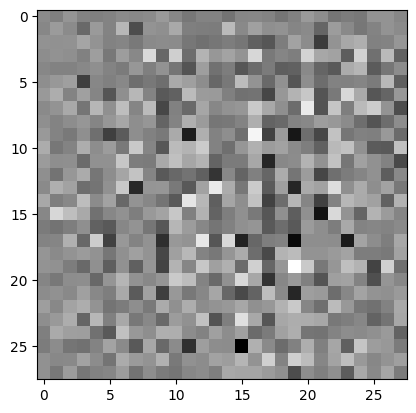

In [75]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

As we can see the generator starts with no knowledge of the dataset simply creating a mapping of noise to noise before learning to map noise to images that trick the descriminator.

In [76]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [77]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00036443]], shape=(1, 1), dtype=float32)


### Architecture
Unlike the VAE here we see the use of dropout layers and leaky relu likely due to the fact that GANS are notoriously diffcult to train and fall prone to overfitting and local minimums. This makes sense since adversarially training two models rather then constrainging two models with a low dimensional space leads to a more chaotic optimization process which is prone to one model learning faster then the other leaving it unable to improve. For this reason the generator and descriminator have similar capacities and architecture with conv2d, relu, and dropout layers.

In [78]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [79]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [80]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

Here the training step is defined whereby fake images are generated by the generator to be evaluated by the descriminator. The descriminator is updated based on whether it correctly identified the fake image while the generator is directly updated based on if it was able to correctly fool the discriminator to classifying the generated image as real. This process is chaotic and care must be given to ensure one model does not learn faster then the other.

In [81]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
    
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

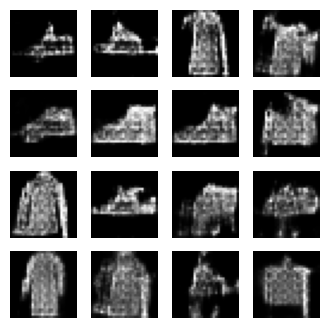

In [82]:
train(train_dataset, EPOCHS)

### GAN training
It was interesting to watch the generator evolve as you can visually see the artifacts of the convolutions in this low resolution (see below for the evolution gif). Recently for the discussion I read a paper that indicates these artifacts can be avoided by adopting architectures for GANS that are less pixel coordinate dependent (similar to the effects of data augementation). Overall the GAN does not seem to reach the same visual quality of the VAE but still produces reasonable images that could be in the dataset albeit after taking longer to train.

In [83]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

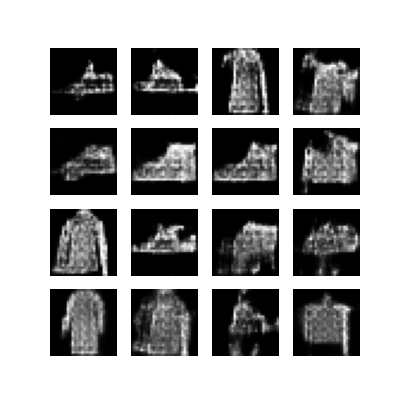

In [84]:
display_image(EPOCHS)


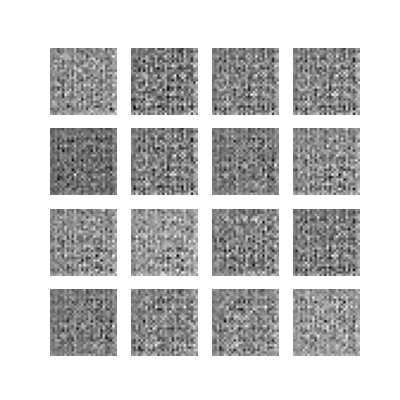

In [85]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
    
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

## Analysis
Overall, GANs for the Fashion MNIST dataset do not seem to perform as well or consistently as VAE. Nonetheless it is an interesting and promising technique however the adversarial nature of training one model in the loss function of another leads to training instability and difficulty as can be seen above. Compared to the VAE the GAN seems to have a broader spectrum of output likely due to the generator generating from pure noise rather then a latent space so there may be some better generalizion properties. However, the overall visual artifacts prevent me from calling the GAN a success and further fine tuning would be needed to provide visually pleasing results. In this comparison I would be choosing VAE's over gans to generate images due to its ease of training and more consistent results.

Have a nice day!

## Project update:
Projects in ML and AI
Professor Uzma Mushtaque
Fall 2022
Project Update

Project title.
Dejargonizing
 
Team member names (team size can be from 1 to 5).
Michael Fababeir
Roham Hussain
Anushka Potdar
Eric Nelson
 
Progress update.
 
* Determined a weekly meeting time
* Finalized a dataset: BBC news articles from https://www.kaggle.com/datasets/pariza/bbc-news-summary
* Created a GitHub repository
* Determined a collaboration method/process
  * Everyone will work individually in their own branches in their own Colab notebooks.
  * When at a milestone state, we will each submit a pull request to the master branch.
  * Each week we will make sure we are at the same spot before overriding.
* Mapped out high-level objectives
  * Research and determine what tools/libraries to use.
  * Review what the data set looks like and annotations.
  * Create template starter Colab Notebook with loading our data and sections with requirements.
  * Exploratory Data Analysis and Preprocessing (Next week’s meeting.)
 
 
 
